In [1]:
from math import floor, log10

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.mplot3d import Axes3D, axes3d

from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [37]:
D = 0.01

# Значение времени и расстояния
T = 10 # 110
X = 1

# количество интервалов разбиения
Nt = 1000 # 200
Nx = 100

# Определение шага
dt = T/Nt
dx = X/Nx
print(dt, dx)

cond = 2*(D*dt)/dx**2
print("Условие устойчивости: %.3f" % cond)

def f(x):
    if (x < 0):
        return 0
    elif (x == 0):
        return 0.5
    else:
        return 1

0.01 0.01
Условие устойчивости: 2.000


Добавляем граничные условия.

In [38]:
M = np.zeros((Nx, Nt))

for i in range(0, Nx):
    x = i * dx
    M[i, 0] = f(x-0.25) - f(x-0.75)
    

for j in range(0, Nt):
    M[0, j] = 0
    M[int(Nx-1), j] = 0


format_sc_n = lambda x: "{:1.0e}".format(x) if x > 1000 else x # scientific notation

# df = pd.DataFrame(M)
# df = df.applymap(format_sc_n)
# df

Рассчитываем коэффициенты в матрице:

In [39]:
A = np.zeros((Nx, Nx))

# we started with 1 and stopped on 9 here
for i in range(1, Nx-1):
    A[i,i] = 1 + ((2*dt*D/dx**2))
    A[i, i+1] = (-dt*D/dx**2)
    A[i, i-1] = (-dt*D/dx**2)

A[0,0] = 1.
A[Nx-1, Nx-1] = 1.

#### Матрица коэффициентов будет иметь вид:

In [40]:
#  pd.DataFrame(A)

Решаем системы уравнений на каждом временном шаге

In [41]:
print(M.shape)
# pd.DataFrame(M[:,0])

(100, 1000)


In [42]:
for j in range(1, Nt):
    M[:, j] = np.linalg.solve(A, M[:, j-1])

pd.set_option('display.max_columns', None)
result = pd.DataFrame(M, dtype=float)
result = result.applymap(lambda x: "{:1.3e}".format(x))
# result

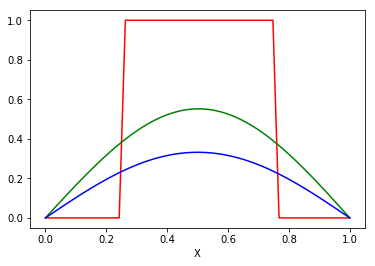

In [43]:
### pd.DataFrame(M[:, i]) # the columns we need

x = np.linspace(0, X, Nx)

plt.xlabel('X')
plt.plot(
    x, M[:, 0], 'r',
    x, M[:, int(Nt/2)], 'g',
    x, M[:, int(Nt-1)], 'b',
)
plt.show()

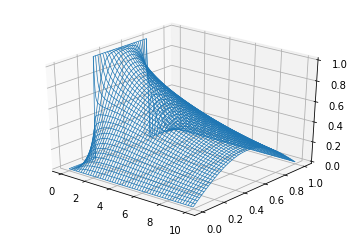

In [44]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(0, X, Nx)
y = np.linspace(0, T, Nt)

F, S = np.meshgrid(y,x)

ax.plot_wireframe(F, S, M, linewidth=.7)
ax.view_init(30, 310)
plt.show()